# **Autoencoder Fashion MNIST**

# **Import Library**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# **Load dan Preprocessing Data**

In [5]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

# **Encoder Model (3 lapis CNN)**

In [6]:
def build_encoder(latent_dim=64):
    encoder_input = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, activation='relu')(x)
    return models.Model(encoder_input, latent, name="encoder")

# **Decoder Model (3 lapis Deconv)**

In [7]:
def build_decoder(latent_dim=64):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_input)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return models.Model(decoder_input, x, name="decoder")

# **Autoencoder**

In [8]:
latent_dim = 64
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
autoencoder_input = layers.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = models.Model(autoencoder_input, decoded, name="autoencoder")

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 64)                  │         219,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 28, 28, 1)           │         259,521 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

# **Training**

In [9]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.4032 - val_loss: 0.2908
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2850 - val_loss: 0.2801
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2767 - val_loss: 0.2749
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2721 - val_loss: 0.2729
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2690 - val_loss: 0.2702
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2680 - val_loss: 0.2689
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2662 - val_loss: 0.2678
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2649 - val_loss: 0.2666
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2644 - val_loss: 0.2657
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2639 - val_loss: 0.2650
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2629 - val_loss: 0.2647
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/ste

# **Visualisasi Rekonstruksi**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


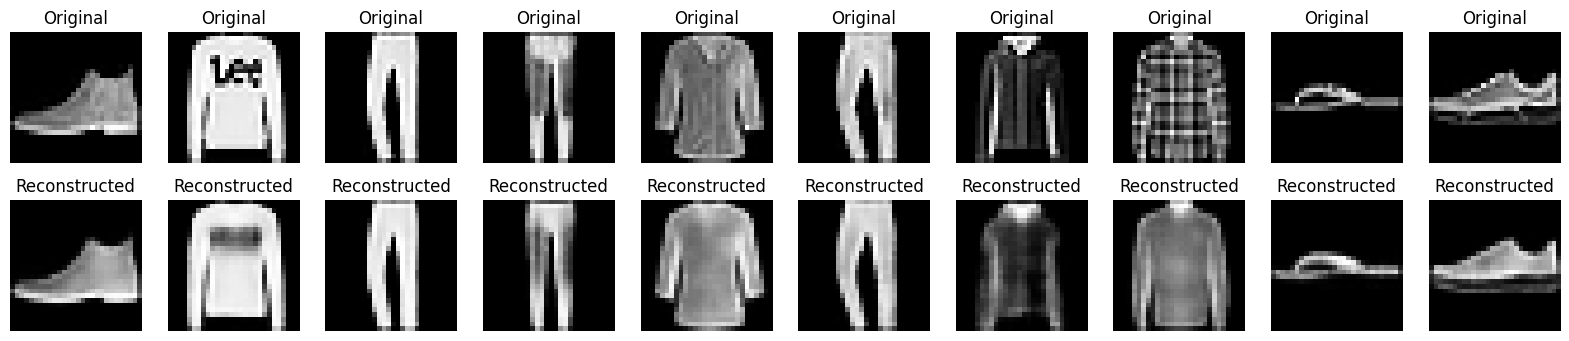

In [10]:
decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # Gambar Asli
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Gambar Rekonstruksi
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()